# Palifico Part 1
The goal of this part is to create the rules and game mechanics for the game of palifico so that `NUM_PLAYERS` can play the game by manually inputting their guesses. The Part is divided into 10 problems each of which will be used in subsequent problems to slowly build up the whole game.

## Rules
You know them, but here's a recap:
* Every player starts with 5 dice
* In every round, all players roll all of their dice and peak to see the number value on each dice
* A round then starts with the first player guessing a number of dice as well as a number value (dice face)
  so that at least more than the given number of dice exist in the whole game (the dice of all players) for that given face
    E.g 5 fives or 3 twos (5 dices corresponding to the face with number 5, ...)
  Starting with the value of a tucan is not allowed unless he playes a palifico (see below)
* The round continious by the next player either calling bullshit or continuing the guessing game. 
  This can be done by either increasing the number value (dice face) or by increasing the number of dice, or both
    E.g after 5 fives the next player must at least say either 5 sixes or 6 fives
* Instead of a number value a tucan (dice value 1) can be used. This will correspond to ceil(value/2) of the given number of dice so
    E.g after 5 fives, 3 tucans can be guessed. After 6 fours, 3 tucans can be guessed, ...
* If a previous player gave a guess in form of this tucan, the player can switch back to normal face values by 2*value+1 so
    E.g after 3 tucans, 7 of any given number can be guessed. After 1 tucan, 3 of any number

* If a player calls bullshit, all the dice of the given number value are counted (including tucans except a palifico is palyed).
  If the number matches or exceeds the guessed number the player calling bullshit looses a dice, otherwise the previous player that guessed wrong looses one.
* The next round is played by player that lost a dice
* If a player ends up with one dice left, a palifico is played. All players have to roll the dice while loudly shouting "PALIFICOO". The round starts normally with the player making a guess, this time he can start with a number value of a tucan (1) and the tucans don't count towards the total number of dice for any given value (except of course for the tucans themselves)
* All subsequent players have to continue guessing with the same number values, so it is fixed

3.0


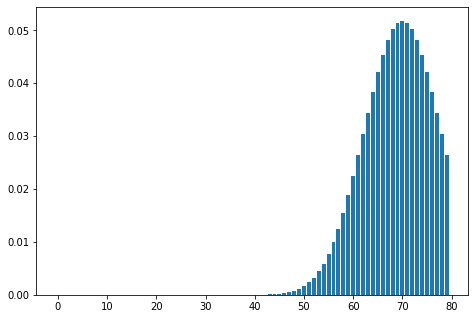

In [100]:
%matplotlib inline
# 
# P(p, n) = 1/6^n * sum_(k=0)^(floor((p-n)/6)) (-1)^k (n choose k) (p-6k-1 choose n-1)


from scipy.special import comb
print(comb(3,2))
def prob(p,n):
    limit = max(0, (p-n)//6)
    sum = 0
    for k in range(0, limit+1):
        sum = sum + pow(-1,k) * comb(n, k) * comb(p-6*k-1, n-1)
    return sum / pow(6, n)
    
    
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plist = list(range(80))
students = [prob(p,20) for p in plist]
ax.bar(plist,students)
plt.show()

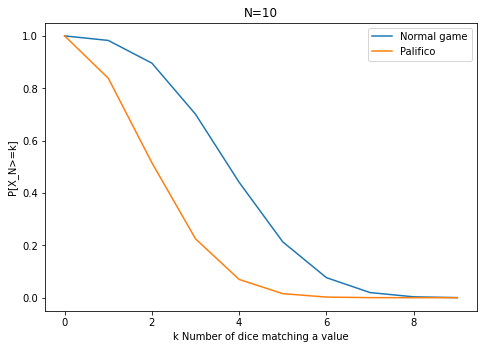

In [162]:
from scipy.stats import binom

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

# Probability P[X>=k] that of n dice at least k dice have:
# In case of a palifico: 
#     the same numeric value (e.g. 2) => p = 1/6
# In case of no palifico:
#     same numeric value (e.g. 2) or a 'tucan' (value 1) => p = 2/6
def palifico_prob(n,k,is_palifico=False):
    if k < 1:
        return -1
    return 1-binom.cdf(k-1, n, (1 + (not is_palifico))/6)
    
n = 10
p = 1/6
k = np.arange(0, n)
y = 1-binom.cdf(k-1, n, 2*p)
y_palifico = 1-binom.cdf(k-1, n, p)
ax.plot(k, y, label='Normal game')
ax.plot(k, y_palifico, label='Palifico')
plt.title('N={}'.format(n))
plt.xlabel('k Number of dice matching a value')
plt.ylabel('P[X_N>=k]')
plt.legend()
plt.show()

In [141]:
palifico_prob(10, 2, False)

0.8959508205050042